# Ridge Regression

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('Social_Network_Ads.csv')

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['categorical_column_encoded'] = label_encoder.fit_transform(df['Gender'])

df = df.drop(['Gender'], axis=1)

columns = df.columns.tolist()
index1 = columns.index('Purchased')
index2 = columns.index('categorical_column_encoded')
columns[index1], columns[index2] = columns[index2], columns[index1]
df = df[columns]

df = df.rename(columns={"categorical_column_encoded": "Gender"})

X = df.iloc[:,:-1].values
y = df.iloc[:,4].values

# Step 1: Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Feature scaling (optional but recommended for Ridge Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Create and train the Ridge Regression model
alpha = 0.001  # You can choose the value of alpha (regularization strength) based on cross-validation
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train_scaled, y_train)

# Step 4: Make predictions on the test set
y_pred = ridge_model.predict(X_test_scaled)

# Step 5: Evaluate the model
train_score = ridge_model.score(X_train_scaled, y_train)
test_score = ridge_model.score(X_test_scaled, y_test)

print("Train score: {:.2f}".format(train_score))
print("Test score: {:.2f}".format(test_score))

In [17]:
ridge_model.coef_

array([0.0018887 , 0.26047435, 0.14571734, 0.00938559])

In [18]:
ridge_model.intercept_

0.35937500000000006

# LASSO regression

In [67]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [68]:
data_set = pd.read_csv('House price India.csv')

data_set = data_set.drop_duplicates()
data_set.count()

id                                       14620
Date                                     14620
number of bedrooms                       14620
number of bathrooms                      14620
living area                              14620
lot area                                 14620
number of floors                         14620
waterfront present                       14620
number of views                          14620
condition of the house                   14620
grade of the house                       14620
Area of the house(excluding basement)    14620
Area of the basement                     14620
Built Year                               14620
Renovation Year                          14620
Postal Code                              14620
Lattitude                                14620
Longitude                                14620
living_area_renov                        14620
lot_area_renov                           14620
Number of schools nearby                 14620
Distance from

In [69]:
data_set.shape

(14620, 23)

In [70]:
print(data_set.isnull().sum())

id                                       0
Date                                     0
number of bedrooms                       0
number of bathrooms                      0
living area                              0
lot area                                 0
number of floors                         0
waterfront present                       0
number of views                          0
condition of the house                   0
grade of the house                       0
Area of the house(excluding basement)    0
Area of the basement                     0
Built Year                               0
Renovation Year                          0
Postal Code                              0
Lattitude                                0
Longitude                                0
living_area_renov                        0
lot_area_renov                           0
Number of schools nearby                 0
Distance from the airport                0
Price                                    0
dtype: int6

In [71]:
data_set.dropna()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14615,6762830250,42734,2,1.50,1556,20000,1.0,0,0,4,...,1957,0,122066,52.6191,-114.472,2250,17286,3,76,221700
14616,6762830339,42734,3,2.00,1680,7000,1.5,0,0,4,...,1968,0,122072,52.5075,-114.393,1540,7480,3,59,219200
14617,6762830618,42734,2,1.00,1070,6120,1.0,0,0,3,...,1962,0,122056,52.7289,-114.507,1130,6120,2,64,209000
14618,6762830709,42734,4,1.00,1030,6621,1.0,0,0,4,...,1955,0,122042,52.7157,-114.411,1420,6631,3,54,205000


In [72]:
Q1 = data_set.quantile(0.25, numeric_only=True)
Q3 = data_set.quantile(0.75, numeric_only=True)
IQR = Q3 -Q1
print(IQR)

id                                        10846.5000
Date                                        116.0000
number of bedrooms                            1.0000
number of bathrooms                           0.7500
living area                                1130.0000
lot area                                   5789.2500
number of floors                              1.0000
waterfront present                            0.0000
number of views                               0.0000
condition of the house                        1.0000
grade of the house                            1.0000
Area of the house(excluding basement)      1040.0000
Area of the basement                        580.0000
Built Year                                   46.0000
Renovation Year                               0.0000
Postal Code                                  31.0000
Lattitude                                     0.2013
Longitude                                     0.2040
living_area_renov                           89

In [73]:
data_set, Q1 = data_set.align(Q1, axis=1, copy=False)
data_set, Q3 = data_set.align(Q3, axis=1, copy=False)

data_set = data_set[~((data_set < (Q1 - 1.5 * IQR)) |(data_set > (Q3 + 1.5 * IQR))).any(axis=1)]
data_set.shape

(10067, 23)

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
id,1.000000,0.047228,-0.240364,-0.363654,-0.521765,0.092121,-0.242282,NaN,NaN,-0.078979,...,-0.000888,NaN,0.387474,-0.545018,-0.077539,-0.461155,0.110350,-0.010809,-0.005625,-0.972866
Date,0.047228,1.000000,-0.008889,-0.010533,-0.007984,0.000549,-0.009191,NaN,NaN,-0.028839,...,-0.003338,NaN,0.023688,-0.032811,-0.021120,-0.022631,-0.010763,0.006312,0.018920,-0.042195
number of bedrooms,-0.240364,-0.008889,1.000000,0.442841,0.618307,0.208429,0.130250,NaN,NaN,0.022098,...,0.163410,NaN,-0.029094,-0.086401,0.200915,0.420398,0.197503,0.014817,-0.010688,0.252251
number of bathrooms,-0.363654,-0.010533,0.442841,1.000000,0.664753,-0.083506,0.524612,NaN,NaN,-0.160857,...,0.599221,NaN,-0.122364,-0.048714,0.298905,0.512520,-0.096999,0.005717,0.002745,0.357021
living area,-0.521765,-0.007984,0.618307,0.664753,1.000000,0.170093,0.311554,NaN,NaN,-0.070134,...,0.343646,NaN,-0.118239,-0.023651,0.320525,0.729721,0.151203,0.005063,-0.001817,0.537994
lot area,0.092121,0.000549,0.208429,-0.083506,0.170093,1.000000,-0.400579,NaN,NaN,0.139945,...,-0.100815,NaN,0.108557,-0.135948,0.229681,0.201719,0.865129,0.001190,-0.006685,-0.068721
number of floors,-0.242282,-0.009191,0.130250,0.524612,0.311554,-0.400579,1.000000,NaN,NaN,-0.307947,...,0.547734,NaN,-0.140035,0.014360,0.136757,0.253257,-0.426204,-0.013259,0.013420,0.233434
waterfront present,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
number of views,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
condition of the house,-0.078979,-0.028839,0.022098,-0.160857,-0.070134,0.139945,-0.307947,NaN,NaN,1.000000,...,-0.433054,NaN,0.029136,0.026008,-0.121183,-0.135516,0.150486,-0.014195,0.003818,0.095471


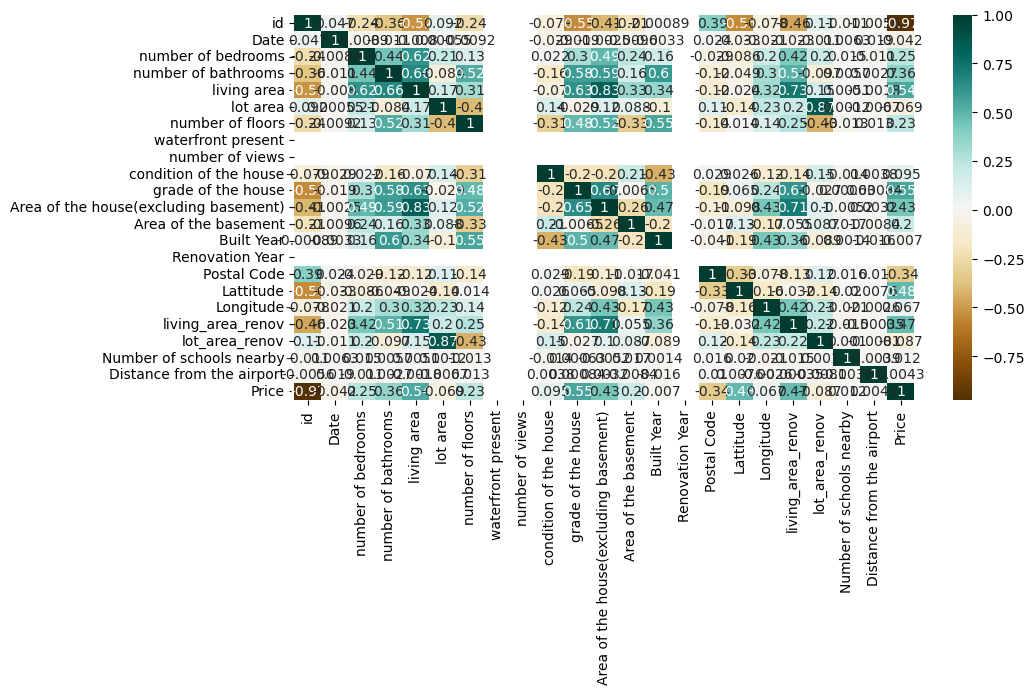

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,5))
c = data_set.corr(numeric_only=True)
sns.heatmap(c,cmap = 'BrBG', annot = True)
c

In [75]:
X = data_set.iloc[:,:-1].values
y = data_set.iloc[:,22].values

In [76]:
print(X_train.shape)
print(y_train.shape)

(8053, 22)
(8053,)


In [77]:
alpha = 0.1  # Regularization strength, you can tune this hyperparameter
lasso_model = Lasso(alpha=alpha, max_iter=100000)

# Step 3: Train the Model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
lasso_model.fit(X_train, y_train)

C:\Users\ritam\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.776e+10, tolerance: 2.581e+10
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.1, max_iter=100000)

In [78]:
coefficients = lasso_model.coef_

In [79]:
y_pred = lasso_model.predict(X_test)

In [80]:
r_squared = lasso_model.score(X_test, y_test)
print("R-squared:", r_squared)

R-squared: 0.9490324498274887


In [81]:
lasso_model.coef_

array([-3.22339599e+01,  7.18620244e+00, -1.37320325e+03, -5.27952344e+03,
        1.25750210e+01,  1.24585087e-01,  2.38748529e+02,  0.00000000e+00,
        0.00000000e+00,  4.00206485e+03,  3.36800487e+03,  4.60617188e-02,
       -7.82581572e+00, -7.56885943e+01,  0.00000000e+00,  2.44460042e+02,
       -6.94840678e+04, -3.61024454e+04,  1.05201932e-01,  3.82134076e-01,
        5.47372422e+02, -2.76658286e+01])

In [82]:
lasso_model.intercept_

217962482895.72507

In [83]:
lasso_model.n_iter_

100000

# Elastic-Net

In [156]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [160]:
alpha = 0.01  # Regularization strength
l1_ratio = 0.8 # Mixing parameter between L1 and L2 regularization

In [161]:
elastic_net_model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio, max_iter=50000)

In [162]:
import numpy as np
mean_values = np.mean(x, axis=0)
std_values = np.std(x, axis=0)
print("Mean values of features:", mean_values)
print("Standard deviation of features:", std_values)

Mean values of features: [ 6.76282238e+09  4.26052492e+04  3.27108374e+00  1.98892421e+00
  1.82923959e+03  6.98555896e+03  1.47849409e+00  0.00000000e+00
  0.00000000e+00  3.44273368e+00  7.40160922e+00  1.59524168e+03
  2.33997914e+02  1.97179726e+03  0.00000000e+00  1.22032706e+05
  5.27926177e+01 -1.14420605e+02  1.80449131e+03  6.87051376e+03
  2.01331082e+00  6.49493394e+01]
Standard deviation of features: [5.54690600e+03 6.71355424e+01 7.74533347e-01 6.46328203e-01
 6.19292393e+02 3.39610878e+03 5.49622984e-01 0.00000000e+00
 0.00000000e+00 6.60342372e-01 8.07318143e-01 6.04740558e+02
 3.58943702e+02 2.93210669e+01 0.00000000e+00 1.92163191e+01
 1.40990710e-01 1.23256074e-01 5.13720946e+02 3.01278404e+03
 8.19464725e-01 8.93628409e+00]


In [163]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)
elastic_net_model.fit(x_train, y_train)

C:\Users\ritam\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.736e+12, tolerance: 1.624e+10
  model = cd_fast.enet_coordinate_descent(


ElasticNet(alpha=0.01, l1_ratio=0.8, max_iter=50000)

In [164]:
cv_scores = cross_val_score(elastic_net_model, X, y, cv=5)

C:\Users\ritam\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.297e+12, tolerance: 2.593e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\ritam\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.576e+12, tolerance: 2.572e+10
  model = cd_fast.enet_coordinate_descent(
C:\Users\ritam\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.697e+12, toleranc

In [165]:
print("Cross-validation scores:", cv_scores)
average_cv_score = cv_scores.mean()
print("Average cross-validation score:", average_cv_score)

Cross-validation scores: [0.94824436 0.95518492 0.95661471 0.9526575  0.94698588]
Average cross-validation score: 0.9519374738580396


In [166]:
y_pred = elastic_net_model.predict(x_test)

In [167]:
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 1603409797.2180438


In [168]:
accuracy = r2_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 95.08%


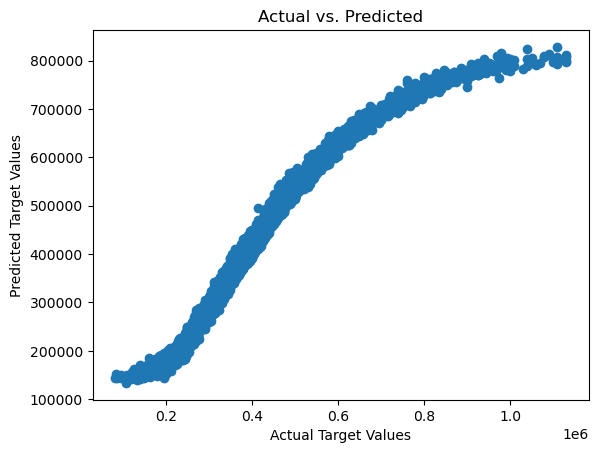

In [169]:
residuals = y_test - y_pred
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Target Values')
plt.ylabel('Predicted Target Values')
plt.title('Actual vs. Predicted')
plt.show()

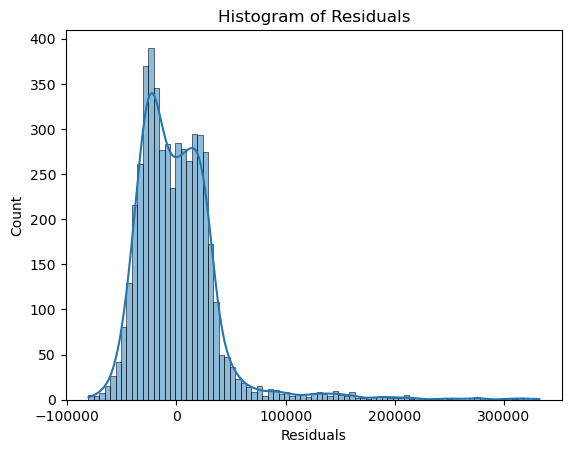

In [171]:
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')
plt.show()

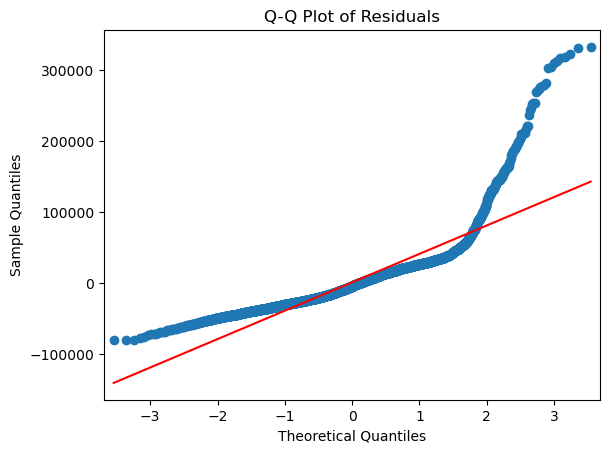

In [174]:
import statsmodels.api as sm
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()